# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [ ]:
RANDOM_STATE = 333

# Apartado 2: Recuperación de información

__Número de grupo: 13__

__Nombres de los estudiantes: Esther Babon Arcauz y Claudia López-Mingo Moreno__

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no lo vamos a usar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.

Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

In [ ]:
##Primero debemos importar la herramienta de pande desde numpy
import numpy as np
import pandas as pd

In [ ]:
##para poder ejecutarlo desde google collaborate 
from google.colab import files
uploaded = files.upload()

Saving BBC News.csv to BBC News.csv


In [ ]:
##creamos el dataframe a partir de fichero BBC News.csv
##teniendo en cuenta que la columna ArticleId es un identificador y no vamos a usarlo para clasificar
df_conID = pd.read_csv('BBC News.csv')
##el df que vamos a usar no va a tener la columna de ArticleId, podriamos usarlo como valor de columna pero como no estan ordenadas ni numeradas en desde el 0 hasta 1489 nos dificultara el trabajo
df = df_conID.loc[:,['Text', 'Category']]
df

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
1485,double eviction from big brother model caprice...,entertainment
1486,dj double act revamp chart show dj duo jk and ...,entertainment
1487,weak dollar hits reuters revenues at media gro...,business
1488,apple ipod family expands market apple has exp...,tech


In [ ]:
##estudiamos el tamaño del conjunto de datos 
df.describe().transpose()

,count,unique,top,freq
Text,1490,1440,microsoft seeking spyware trojan microsoft is ...,2
Category,1490,5,sport,346


In [ ]:
# Frecuencia de las clases
df['Category'].value_counts() / df['Category'].count() * 100

sport            23.221477
business         22.550336
politics         18.389262
entertainment    18.322148
tech             17.516779
Name: Category, dtype: float64

Al analizar el conjunto de datos vemos que tenemos 1490 textos, de los cuales 50 son segundas copias. Tambien vemos que los textos se categorizan en 5 grupos, la categoria en la que más textos hay es deportes con 346 textos.

Vemos que la proporción de noticias que pertenecen a cada una de las categorías es bastante similar. Para que la proporción fuese totalmente equitativa la frecuencia de clases deveria de ser del 20%, en la celda superior vemos que todas las categorias rondan ese valor.

Si estas clases no hubiesen estado compensadas, hubiesemos necesitado calcular otras medidas como la tasa de verdaderos negativos ó positivos y el valor predictivo positivo para cada clase y luego hacer la media de todo esto para así entender cómo se comporta el sistema en cada una de las clases, en cambio, al tener las clases niveladas la medida de "exactitud" nos serviría para determinar la efectividad de nuestro sistema. Además, a la hora de realizar la división de conjuntos de entrenamiento y de test para encontrar el mejor modelo, no nos tendremos que preocupar por encontrar una partición estratificada de estos conjuntos ya que estas clases están bien equilibradas.

In [ ]:
##Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función train_test_split de sklearn.
# Como la proporción de clases a predecir está balanceada no hace falta usar la versión estratificada al hacer la partición
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Category'], test_size=0.2, random_state=RANDOM_STATE)

## 2) Representación basada en bolsa de palabras y tf-idf

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y el valor tf-idf de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Calcula la precisión de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y comenta las clases en las que se comporta mejor y peor. ¿Crees que los resultados son buenos?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
##primero aplicamos countvectorizer y despues tf-idf
##Obtenemos las frecuencias de las palabras con CountVectorizer.
vectorizer = CountVectorizer(stop_words='english', binary=False)

# Tomamos los textos del conjunto de datos de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar (english)
train_vector_data_count = vectorizer.fit_transform(X_train)
feature_names_train = vectorizer.get_feature_names()
##aplicamos vectorización al conjunto de test tambien
test_vector_data_count = vectorizer.transform(X_test)
feature_names_test = vectorizer.get_feature_names()



tfidftrans = TfidfTransformer()
##aplicamos vectorizacion tf-idf al conjunto de test y train
train_tfidf = tfidftrans.fit_transform(train_vector_data_count)

test_tfidf = tfidftrans.fit_transform(test_vector_data_count)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

    ##AÑADIMOS ESTA FUNCIONALIDAD EXTRA PARA QUE NOS IMPRIMA DIRECTAMENTE LAS PALABRAS ELIMINADAS
    ##mostrar las palabras  que aparecen en el mensaje original pero no en el vectorizado
    if data is not None:
      mensaje_original_array = data[index].split()
      palabras_descartadas = []
      palabras_elegidas = []
      terminos_mensaje_vectorizado = terminos.compressed()
      count = 0

      for i in range(0, len(mensaje_original_array)):
        for j in range(0, len(terminos_mensaje_vectorizado)):
          if( mensaje_original_array[i] != terminos_mensaje_vectorizado[j]):
              count+= 1
          else:
              palabras_elegidas.append(mensaje_original_array[i])

        if (count == len(terminos_mensaje_vectorizado)):
              palabras_descartadas.append(mensaje_original_array[i])
        count = 0

      print('Nº de palabras eliminadas: ', len(palabras_descartadas))  
      print('Nº de palabras en el mensaje original: ' , len(mensaje_original_array))
      print('Las palabras eliminadas  son: ', palabras_descartadas)
      print('Las palabras escogidas son: ', palabras_elegidas)
      

In [ ]:
##escribimos los terminos presentes como bolsa de palabras para diferentes indices
index = 50

##en el apartado de data ponemos la lista de mensajes original para ver que muestre el texto original tambien
write_terms(feature_names_train, X_train,train_tfidf, index)

Mensaje 50 : telewest to challenge sky plus cable firm telewest is to offer a personal video recorder (pvr) in a set -top box to challenge sky plus.  sky plus is the market leader in the field of digital video recorders in the uk  with 474 000 subscribers. pvrs record tv programmes to a hard drive  letting viewers pause  and rewind live television and effectively  time shift  the viewing experience. a number of pvrs incorporating freeview digital terrestrial tv are also on the market but their success is limited. telewest s pvr will offer a 160gb hard drive  which has storage for up to 80 hours of programmes. the box has three tuners  which means viewers can record two channels simultaneously while watching a third channel.  sky plus boxes come in two versions - a 20gb version for £99 and a 160gb version for £399. sky also charges a £10 subscription fee to the service  unless viewers have a subscription to one of its premium packages. telewest has yet to reveal pricing for the new box 



Hemos aplicado la vectorización TF-IDF a los conjuntos de test y entrenamiento. En la celda superior mostramos un mensaje en su formato original y en la verisón vectorizada. Las palabras eliminadas también estan listadas.

Estamos usando vectorización TF-IDF, que calcula la inversa de la frecuencia de apración de cada termino en todos los documentos. Hace la inversa de CountVectorizer. Este tipo de vectorización hace que términos que aparecen en todos los documentos no tengan mucho peso. Asumimos que las palabras eliminadas son las que aparecen en todos los textos y tienen menos peso. 


**Calculamos la precisión de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno**

In [ ]:
##PARA CALCULAR LA PRECISION DE CADA UNA DE LAS CLASES USAMOS COMO CONSULTA LOS DOCUMENTOS DE TEST Y LA SIMILITUD DEL COSENO 
from sklearn.metrics.pairwise import cosine_similarity

def knn(query, X_train, k):
    '''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando 
    la similitud del coseno.
    
    Parámetros:
    - query: documento consulta vectorizado
    - X_train: documentos de entrenamiento vectorizados
    - k: número de documentos a recuperar
    
    Devuelve:
    - índices de los k documentos más similares a la consulta.
    '''
    
    # Necesitamos un vector de dimensión (1, X). Si se pasa un vector de dimensión X, transformarlo
    if len(query.shape) == 1:
        query = query.reshape(1, -1)

    simil = cosine_similarity(query, X_train)
    simil_idx = np.argsort(simil.flatten())
    simil_idx = simil_idx[::-1]
    return simil_idx[:k]

In [ ]:
def precision_at_k(y_selected, y_real, k):
    '''Devuelve la precisión @k de los documentos seleccionados.
    
    Parametros:
    - y_selected: etiquetas de los documentos seleccionados (se usan los k primeros)
    - y_real: etiqueta de la categoría correcta
    - k: número de documentos que se tienen en cuenta
    
    Devuelve:
    - Precisión@k
    '''
    
    return np.sum(y_selected[:k] == y_real) / k * 100

In [ ]:
def mean_precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k media para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión en tanto por ciento.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        
    # Calcular medias
    for y in y_precisions:
        y_precisions[y] = np.mean(y_precisions[y])
    
    return y_precisions

In [ ]:
##PARA SIMPLIFICAR LOS CALCULOS VAMOS A COGERLOS 400 PRIMEROS TEXTOS DE TEXT Y CALCULAMOS LA PRECISIÓN USANDO LO QUE HEMOS DEFINIDO ARRIBA

p10 = mean_precisions_per_class(train_tfidf, y_train, test_tfidf[:400,], y_test[:400], 10)

p10

{'business': 80.13698630136986,
 'entertainment': 81.14754098360656,
 'politics': 88.83333333333333,
 'sport': 96.55737704918033,
 'tech': 86.97674418604652}

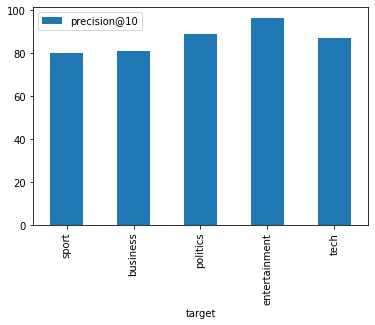

In [ ]:
##mostramos en diagrama de barras para facilitar el analisis visual
import pandas as pd

df_p10 = pd.DataFrame.from_dict(p10, orient='index', columns=['precision@10'])

df_p10["target"] = ['sport', 'business', 'politics', 'entertainment', 'tech']

d = df_p10.set_index("target")

d.plot.bar()


Si analizamos los valores de precisión medios para las distintas clases del conjunto de datos podemos ver que no hay mucha diferencia entre los valores de precision, oscilan entre el 80% y el 98%.  Tambien podemos comentar que las clases que consigen mayor precisión son entertainment, tech y politics. Esto se debe a que usan vocabulario especifico. Por el contrario, las clases sport y business obtienen menor precision porque usan un vocabulario mas generico o que se puede confundir con las demas clases. 

En general afirmamos que son buenos valores para un clasificador. 



## 3) Representación basada en word-embeddings y tf-idf

La segunda vectorización que vamos a usar representará los mensajes usando usando word-embeddings usando como pesos la frecuencia de aparición de cada palabra. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test.

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y compara los resultados con los del apartado anterior.

In [ ]:
##importamos las palabras para el word-embedding 
##para poder ejecutarlo desde google collaborate 
from google.colab import files
uploaded = files.upload()

Saving words.txt to words.txt


In [ ]:
##cargamos el fichero words.txt proporcionado en el campus 
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Traducimos el fichero glove a un fichero con formato word2vec
glove_file = 'words.txt'

# Gensim 3 requiere hacerlo en varios pasos
word2vec_file = 'words.txt.word2vec'
glove2word2vec(glove_file, word2vec_file)
model = KeyedVectors.load_word2vec_format(word2vec_file, binary=False)
# En Gensim 3 se pueden obtener de la siguiente manera
words = list(model.vocab.keys())



In [ ]:
##primero vectorizamos a countvectorizer y despues pasamos a tf-idf
# En vocabulary le pasamos el de la word-embedding, ponemos que pase los tokens a minusculas 
# Si usamos la lista de palabras vacías del inglés de sklearn quitamos artículos, preposiciones, etc 
vectorizerEmbedded = CountVectorizer(vocabulary = words,  stop_words='english', binary = False)

# Tomamos los textos del conjunto de datos de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar (english)
train_vector_data_count_embedded = vectorizerEmbedded.fit_transform(X_train)
feature_names_train_embedded = vectorizerEmbedded.get_feature_names()
##aplicamos vectorización al conjunto de test tambien
test_vector_data_count_embedded = vectorizerEmbedded.transform(X_test)
feature_names_test_embedded = vectorizerEmbedded.get_feature_names()



tfidftrans = TfidfTransformer()
##aplicamos vectorizacion tf-idf al conjunto de test y train
train_tfidf_embedded = tfidftrans.fit_transform(train_vector_data_count_embedded)
test_tfidf_embedded = tfidftrans.fit_transform(test_vector_data_count_embedded)




/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Calculamos la precisión de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno**

In [ ]:
##lo mismo que hemos usado en el apartado anterior
##PARA SIMPLIFICAR LOS CALCULOS VAMOS A COGERLOS 400 PRIMEROS TEXTOS DE TEXT Y CALCULAMOS LA PRECISIÓN USANDO LO QUE HEMOS DEFINIDO ARRIBA

p10_embedded = mean_precisions_per_class(train_tfidf_embedded, y_train, test_tfidf_embedded[:400,], y_test[:400], 10)
p10_embedded

{'business': 85.89041095890411,
 'entertainment': 81.14754098360656,
 'politics': 80.16666666666667,
 'sport': 96.55737704918033,
 'tech': 84.65116279069767}

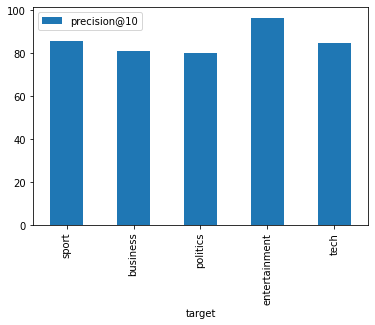

In [ ]:
##mostramos en diagrama de barras para facilitar el analisis visual
import pandas as pd

df_p10 = pd.DataFrame.from_dict(p10_embedded, orient='index', columns=['precision@10'])

df_p10["target"] = ['sport', 'business', 'politics', 'entertainment', 'tech']

d = df_p10.set_index("target")

d.plot.bar()

**Comparando resultados**

Precision sin usar word-embedding:

*   'business': 80.13698630136986
*   'entertainment': 81.14754098360656
*   'politics': 88.83333333333333
*   'sport': 96.55737704918033
*   'tech': 86.97674418604652


Precisión usando word embedding:
*   'business': 85.89041095890411
*   'entertainment':81.14754098360656
*   'politics': 80.16666666666667
*   'sport': 96.55737704918033
*   'tech': 84.65116279069767


Vemos que la única categoria que mejora la precisión usando word-embedding es business, para el resto de categorias el valor de precisión empeora o sigue siendo el mismo. 



## 4) Análisis de errores

Vamos a investigar los resultados para entender mejor dónde están fallando los procesos de recuperación. Sigue los siguientes pasos.


1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings
2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings
3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).
4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.


Puedes usar el código que calcula la intersección de términos que ponemos a continuación

In [ ]:
def terms_in_message(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    mensaje=vector_data[index,:]>0
    terminos_presentes = ma.array(feature_names, mask = ~(mensaje[0].toarray()))

    return set(terminos_presentes.compressed())

La categoría de noticias donde la precisión ha mejorado al incorporar word-embedding es `businnes`

In [ ]:
##PARA VER CUAL ES LA CONSULTA QUE HA MEJORADO MÁS AL USAR WORD-EMBEDDING
maxx = 0
yTest = y_test.to_numpy()
yTrain = y_train.to_numpy()
for i in range (0,298):


  ##consulta sin word-embedding
  p = mean_precisions_per_class(train_tfidf, yTrain, test_tfidf[i], yTest, 1)

  ##consulta con word-embedding
  p_embedded = mean_precisions_per_class(train_tfidf_embedded, yTrain, test_tfidf_embedded[i], yTest, 1)

  if(p['business'] != None and p_embedded['business'] != None):
    diferencia = p['business'] - p_embedded['business']
    ##sacariamos el valor maximo de la diferencia 
    if(max(diferencia, maxx) == diferencia):
      maxx = diferencia
    ##y guardamos le indice de la consulta 
      index =  i

print(index)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


50


In [ ]:
##MOSTRAMOS EL TEXTO ORIGINAL DE LA CONSULTA index QUE HA MEJORADO LA PRECISION MEDIA


print('Texto de la consulta original que ha mejorado la precisión media: \n' , X_train[index], '\n')

##mostramos tambien los terminos en los dos tipos de vectorizaciones
print('Terminos con vectorización tf-idf')
##usamos la función write terms anterior
write_terms(feature_names_train, X_train,train_tfidf, index)
print('\n')

print('Terminos con vectorización tf-idf y word-embedding')
write_terms(feature_names_train_embedded, X_train,train_tfidf_embedded, index)




Texto de la consulta original que ha mejorado la precisión media: 
 telewest to challenge sky plus cable firm telewest is to offer a personal video recorder (pvr) in a set -top box to challenge sky plus.  sky plus is the market leader in the field of digital video recorders in the uk  with 474 000 subscribers. pvrs record tv programmes to a hard drive  letting viewers pause  and rewind live television and effectively  time shift  the viewing experience. a number of pvrs incorporating freeview digital terrestrial tv are also on the market but their success is limited. telewest s pvr will offer a 160gb hard drive  which has storage for up to 80 hours of programmes. the box has three tuners  which means viewers can record two channels simultaneously while watching a third channel.  sky plus boxes come in two versions - a 20gb version for £99 and a 160gb version for £399. sky also charges a £10 subscription fee to the service  unless viewers have a subscription to one of its premium packag

In [ ]:
X_train.head()


955     springer criticises opera musical talk show ho...
593     beijingers fume over parking fees choking traf...
565     apple laptop is  greatest gadget  the apple po...
64      two nigerian banks set to merge nigerian banks...
1422    uk firms  embracing e-commerce  uk firms are e...
Name: Text, dtype: object

In [ ]:
##Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
##para identificar los textos recuperados por la consulta usamos la función  knn definida anteriormente 

##'''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando la similitud del coseno.
## devuelve índices de los k documentos más similares a la consulta.
## el valor de k esta a 1 para que solamente recupere un texto, pero se puede cambiar para que recupere más
index_tfidf = []
index_embedded = []

index_tfidf.extend(knn(test_tfidf[index], train_tfidf,  1))
index_embedded.extend(knn(test_tfidf_embedded[index], train_tfidf_embedded, 1))

##imprimimos las noticias recuperadas con sus categorias
for x in range(0,len(index_tfidf)):
  print('La noticia número ', x+1 , 'recuperada por la consulta con TF-IDF puro es: ')
  print( X_train[index_tfidf[x]], '\n')
  print('Con categoria: ' , y_train[index_tfidf[x]])

for y in range (0, len(index_embedded)):
  print('La noticia número ', y+1 , 'recuperada por la consulta con TF-IDFy word-embedding es: ')
  print( X_train[index_embedded[y]], '\n')
  print('Con categoria: ' , y_train[index_embedded[y]])






La noticia número  1 recuperada por la consulta con TF-IDF puro es: 
nintendo adds media playing to ds nintendo is releasing an adapter for its ds handheld console so it can play music and video.  the add-on for the ds means people can download tv programmes  film clips or mp3 files to the adaptor and then play them back while on the move. the release of the media add-on is an attempt by the japanese games giant to protect its dominance of the handheld gaming market. nintendo said the media adapter will be available from february in japan.  the nintendo ds is the successor to the hugely successful gameboy handheld game console and went on sale in japan on 2 december. the ds has two screens  one of which is touch sensitive  and also has on-board a short-range wireless link that lets people play against each other.  the launch of the media adapter  and the attempt to broaden the appeal of the device  is widely seen as a response to the unveiling of the sony psp which was built as a multi

KeyError: ignored

In [ ]:
##Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
##los terminos de la consulta 
write_terms(feature_names_train, X_train ,train_tfidf, index)

##terminos de la primera noticia mal recuperada con TF-IDF
##tenemos los indices de las noticias recuperadas en index_tfidf
##para sacar las etiquetas de los documentos selccionados seria y_train[index_tfidf[x]]

etiquetas_documentos_Seleccionados = []
etiquetas_reales = []
for x in range (0, len(index_tfidf)):
  etiquetas_documentos_Seleccionados.extend(y_train[index_tfidf[x]])
  etiquetas_reales.extend(y_test[index_tfidf[x]])

for i in range (0,298):
  ##sacamos el primer documento que nos de precision 0
  if (precision_at_k(etiquetas_documentos_Seleccionados, etiquetas_reales, x) == 0):
    write_terms(feature_names_train, X_train ,train_tfidf, i)





In [ ]:
##Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
##terminos de la consulta
write_terms(feature_names_train_embedded, X_train,train_tfidf_embedded, index)


##terminos de la ultima noticia bien recuperada con word embedding

etiquetas_documentos_Seleccionados = []
etiquetas_reales = []
for x in range (0, len(index_embedded)):
  etiquetas_documentos_Seleccionados.extend(y_train[index_embedded[x]])
  etiquetas_reales.extend(y_test[index_embedded[x]])

for i in range (0,298):
  ##sacamos el primer documento que nos de precision 0
  if (precision_at_k(etiquetas_documentos_Seleccionados, etiquetas_reales, x) == 1):
    write_terms(feature_names_train, X_train ,train_embedded, i)






In [ ]:
##A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.